In [103]:
# Import the required modules
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [73]:
# Import the data sets for later use
ion_data, ion_meta = arff.loadarff('../data/ionosphere.arff')
bn_data, bn_meta = arff.loadarff('../data/banknotes.arff')
spf_data, spf_meta = arff.loadarff('../data/steel-plates-fault.arff')

# Convert to pandas dataframes
ion_df = pd.DataFrame(ion_data)
bn_df = pd.DataFrame(bn_data)
spf_df = pd.DataFrame(spf_data)


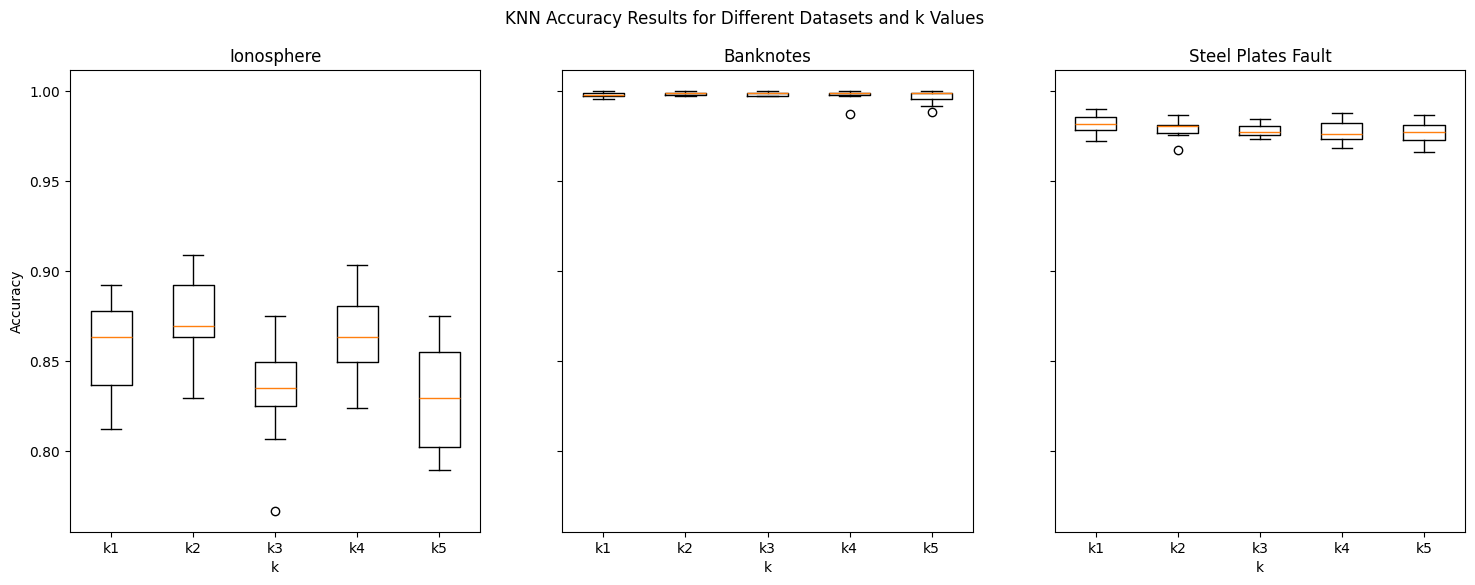

In [99]:
# implement KNN algo on the data sets


def knn(dataset, num_neighbours):

    # Grab the class column
    try:
        X = dataset.drop('class', axis=1)
        y = dataset['class']
    except:
        X = dataset.drop('Class', axis=1)
        y = dataset['Class']

    #print(y)
    # Convert labels to binary format if needed

    y = y.apply(lambda x: x.decode('utf-8'))
    #y = y.apply(lambda x: 1 if x == 'g' or x == '1' else 0)

    predictions_list = []

    for _ in range(10):

        # Split into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # Standardize the features (mean=0, std=1)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Initialize the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=num_neighbours)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        #print(f"Accuracy: {accuracy:.2f}")
        predictions_list.append(accuracy)

    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

# Populate the lists with results
for i in range (5):
    ion_results.append(knn(ion_df, num_neighbours=i+1))
    bn_results.append(knn(bn_df, num_neighbours=i+1))
    spf_results.append(knn(spf_df, num_neighbours=i+1))

# Plot the results in three separate box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Box plot for ionosphere dataset
axes[0].boxplot(ion_results)
axes[0].set_title('Ionosphere')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(['k1', 'k2', 'k3', 'k4', 'k5'])

# Box plot for banknotes dataset
axes[1].boxplot(bn_results)
axes[1].set_title('Banknotes')
axes[1].set_xlabel('k')
axes[1].set_xticklabels(['k1', 'k2', 'k3', 'k4', 'k5'])

# Box plot for steel plates fault dataset
axes[2].boxplot(spf_results)
axes[2].set_title('Steel Plates Fault')
axes[2].set_xlabel('k')
axes[2].set_xticklabels(['k1', 'k2', 'k3', 'k4', 'k5'])

# Show the plot
plt.suptitle('KNN Accuracy Results for Different Datasets and k Values')
plt.show()


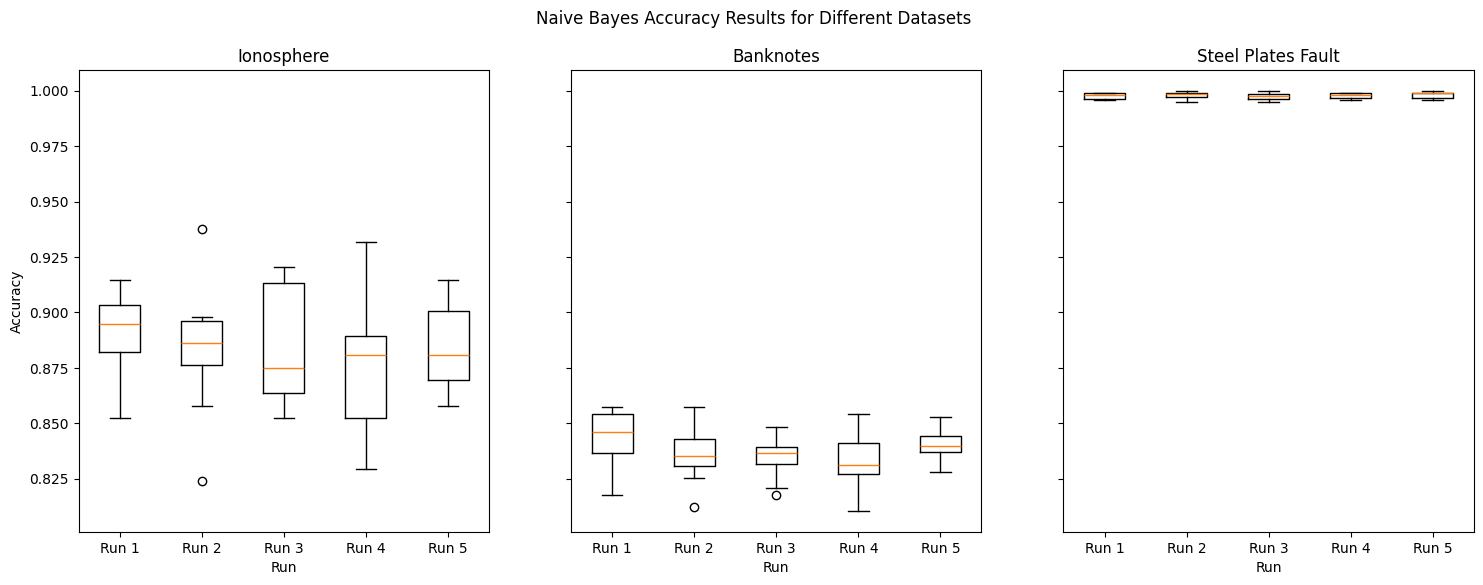

In [102]:
# Implement Naive Bayes on the data sets

def naive_bayes(dataset):
    
    # Grab the class column
    try:
        X = dataset.drop('class', axis=1)
        y = dataset['class']
    except:
        X = dataset.drop('Class', axis=1)
        y = dataset['Class']

    y = y.apply(lambda x: x.decode('utf-8'))
    #y = y.apply(lambda x: 1 if x == 'g' or x == '1' else 0)

    predictions_list = []

    for _ in range(10):

        # Split into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # Standardize the features (mean=0, std=1)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Initialize the model
        nb = GaussianNB()

        # Train the model
        nb.fit(X_train, y_train)

        # Make predictions on test set
        y_pred = nb.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        predictions_list.append(accuracy)
    
    return predictions_list
    
# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

# Populate the lists with results
for _ in range(5):
    ion_results.append(naive_bayes(ion_df))
    bn_results.append(naive_bayes(bn_df))
    spf_results.append(naive_bayes(spf_df))

# Plot the results in three separate box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Box plot for ionosphere dataset
axes[0].boxplot(ion_results)
axes[0].set_title('Ionosphere')
axes[0].set_xlabel('Run')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Box plot for banknotes dataset
axes[1].boxplot(bn_results)
axes[1].set_title('Banknotes')
axes[1].set_xlabel('Run')
axes[1].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Box plot for steel plates fault dataset
axes[2].boxplot(spf_results)
axes[2].set_title('Steel Plates Fault')
axes[2].set_xlabel('Run')
axes[2].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Show the plot
plt.suptitle('Naive Bayes Accuracy Results for Different Datasets')
plt.show()


In [ ]:
# Implement Decision Tree on the data sets

def decision_tree(dataset):
    
    # Grab the class column
    try:
        X = dataset.drop('class', axis=1)
        y = dataset['class']
    except:
        X = dataset.drop('Class', axis=1)
        y = dataset['Class']

    y = y.apply(lambda x: x.decode('utf-8'))
    #y = y.apply(lambda x: 1 if x == 'g' or x == '1' else 0)

    predictions_list = []

    for _ in range(10):

        # Split into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

        # Standardize the features (mean=0, std=1)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Initialize the Decision Tree classifier
        dt = DecisionTreeClassifier()

        # Train the model
        dt.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = dt.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        predictions_list.append(accuracy)

    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

# Populate the lists with results
for _ in range(5):
    ion_results.append(decision_tree(ion_df))
    bn_results.append(decision_tree(bn_df))
    spf_results.append(decision_tree(spf_df))

# Plot the results in three separate box plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Box plot for ionosphere dataset
axes[0].boxplot(ion_results)
axes[0].set_title('Ionosphere')
axes[0].set_xlabel('Run')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Box plot for banknotes dataset
axes[1].boxplot(bn_results)
axes[1].set_title('Banknotes')
axes[1].set_xlabel('Run')
axes[1].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Box plot for steel plates fault dataset
axes[2].boxplot(spf_results)
axes[2].set_title('Steel Plates Fault')
axes[2].set_xlabel('Run')
axes[2].set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'])

# Show the plot
plt.suptitle('Decision Tree Accuracy Results for Different Datasets')
plt.show()
